Mounted at /content/drive
   Team1 Name  Team1 Runs Scored  Team1 Wickets Fell  Team2 Name  \
0          40           0.230769                 1.0           2   
1          26           0.612179                 0.8          65   
2          80           0.336538                 0.8          64   
3          49           0.333333                 0.9          80   
4         102           0.333333                 0.8          89   

   Team2 Runs Scored  Team2 Wickets Fell  Match Venue (Stadium)  \
0           0.278431                 0.1                    118   
1           0.545098                 0.8                     83   
2           0.415686                 0.5                     32   
3           0.403922                 0.1                     32   
4           0.403922                 0.5                    113   

   Match Venue (City)  Match Venue (Country)  Toss Winner  Match Winner  \
0                 111                      1           41             2   
1           

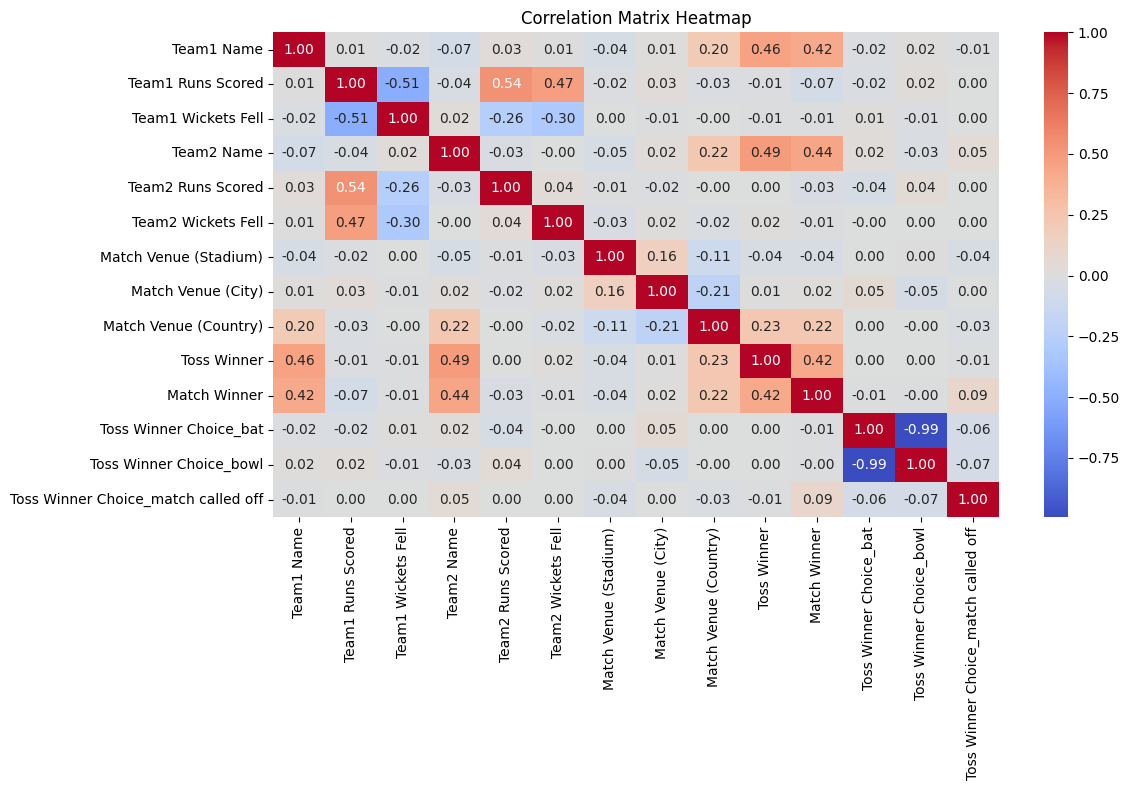

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/t20i_Matches_Data_scaled01.csv'
df = pd.read_csv(file_path)

# display the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

# Compute correlation matrix (numeric columns only)
correlation_matrix = df.corr(numeric_only=True)

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))  # adjust size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest Classifier Accuracy: 0.24


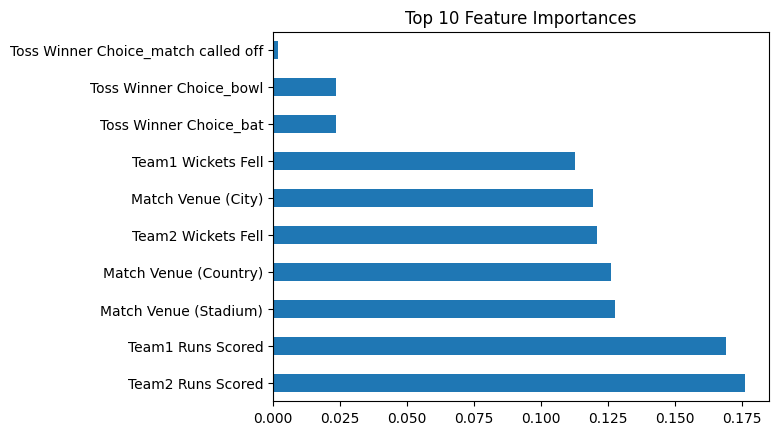

In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/t20i_Matches_Data_scaled01.csv'
data = pd.read_csv(file_path)

# 1. Preprocessing
# Drop columns with too many string values
# (like Match Name, Series Name, etc.)
drop_cols = ['Match Name', 'Series Name', 'Match Date', 'Match Format',
             'Team1 Name', 'Team2 Name', 'Toss Winner', 'Match Result Text',
             'Team1 Playing 11', 'Team2 Playing 11', 'Debut Players',
             'Umpire 1', 'Umpire 2', 'Match Referee']
data = data.drop(columns=[col for col in drop_cols if col in data.columns])

# Target variable: Match Winner
target = 'Match Winner'

# Convert categorical target to numeric
data[target] = data[target].astype('category').cat.codes

# Convert remaining object columns to categorical codes
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].astype('category').cat.codes

# Split features and target
X = data.drop(columns=[target])
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 2. Train Random Forest
clf = RandomForestClassifier(
    n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 3. Evaluate Model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")

# (Optional) Feature Importance
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()